In [1]:
import pandas as pd
import numpy as np
import os
#import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/mnt/c/Users/ansel/AppData/Local/Programs/Microsoft VS Code'

In [3]:
current_path='/mnt/d/GitHub/WQU-Capstone/notebooks/CAE_75etf_17-5-25' 
os.chdir(current_path)

os.getcwd()

'/mnt/d/GitHub/WQU-Capstone/notebooks/CAE_75etf_17-5-25'

## Import data

In [4]:
pkl_data = f"{current_path}/etf_data_with_indicators.pkl"
index_dict = pd.read_pickle(pkl_data)
index_dict

{'ARKK':                             adjClose    adjHigh     adjLow    adjOpen  \
 date                                                                    
 2018-01-02 00:00:00+00:00  36.133634  36.143000  34.885160  34.972263   
 2018-01-03 00:00:00+00:00  36.283489  36.576641  36.274123  36.480173   
 2018-01-04 00:00:00+00:00  36.405245  36.704954  36.039975  36.620661   
 2018-01-05 00:00:00+00:00  36.995297  36.995297  36.592563  36.770515   
 2018-01-08 00:00:00+00:00  36.742418  36.742418  35.890121  36.536368   
 ...                              ...        ...        ...        ...   
 2025-04-16 00:00:00+00:00  45.080000  45.870000  44.055000  45.500000   
 2025-04-17 00:00:00+00:00  45.120000  45.540000  44.555000  45.200000   
 2025-04-21 00:00:00+00:00  44.440000  44.760000  43.680000  44.300000   
 2025-04-22 00:00:00+00:00  46.120000  46.730000  44.980000  44.980000   
 2025-04-23 00:00:00+00:00  47.950000  49.500300  47.830000  48.470000   
 
                            

In [5]:
len(index_dict)

70

In [6]:
index_keys = list(index_dict.keys())
for index in index_keys:
  if (index_dict[index].shape[0] == 0):
    del(index_dict[index])

indices = list(index_dict.keys())
len(indices)

70

In [7]:
reformed_dict = {}
for outerKey, innerDict in index_dict.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values

data = pd.DataFrame(reformed_dict)
data = data[data.index.year < 2024] 
data

ARKK                                   \
                            adjClose    adjHigh     adjLow    adjOpen   
date                                                                    
2018-01-02 00:00:00+00:00  36.133634  36.143000  34.885160  34.972263   
2018-01-03 00:00:00+00:00  36.283489  36.576641  36.274123  36.480173   
2018-01-04 00:00:00+00:00  36.405245  36.704954  36.039975  36.620661   
2018-01-05 00:00:00+00:00  36.995297  36.995297  36.592563  36.770515   
2018-01-08 00:00:00+00:00  36.742418  36.742418  35.890121  36.536368   
...                              ...        ...        ...        ...   
2023-12-22 00:00:00+00:00  53.010000  53.340000  52.340000  52.570000   
2023-12-26 00:00:00+00:00  53.790000  54.015700  53.070000  53.250000   
2023-12-27 00:00:00+00:00  54.260000  54.520000  53.800000  54.300000   
2023-12-28 00:00:00+00:00  54.140000  54.389900  53.790000  54.000000   
2023-12-29 00:00:00+00:00  52.370000  54.210000  52.240000  54.000000   

                                                                     \
                          adjVolume        RSI        ADX      MACD   
date                                                                  
2018-01-02 00:00:00+00:00    420381  62.190719  24.031451  0.499752   
2018-01-03 00:00:00+00:00    667492  63.124168  24.269404  0.548268   
2018-01-04 00:00:00+00:00    358595  63.903928  24.096411  0.589743   
2018-01-05 00:00:00+00:00    361640  67.491476  24.240938  0.662587   
2018-01-08 00:00:00+00:00    421467  64.531309  23.252015  0.691935   
...                             ...        ...        ...       ...   
2023-12-22 00:00:00+00:00  15303396  68.748470  52.045365  2.538119   
2023-12-26 00:00:00+00:00  13212017  70.499077  52.908671  2.590688   
2023-12-27 00:00:00+00:00  13727519  71.533825  53.835976  2.639843   
2023-12-28 00:00:00+00:00  11828164  70.850527  54.684647  2.638699   
2023-12-29 00:00:00+00:00  18769128  61.516539  53.712685  2.466536   

                                                  ...         XT            \
                          MACD_signal      SMA_2  ...     SMA_55    ATR_13   
date                                              ...                        
2018-01-02 00:00:00+00:00    0.551022  35.431192  ...  32.797401  0.235988   
2018-01-03 00:00:00+00:00    0.550471  36.208562  ...  32.819588  0.240886   
2018-01-04 00:00:00+00:00    0.558326  36.344367  ...  32.844160  0.241805   
2018-01-05 00:00:00+00:00    0.579178  36.700271  ...  32.874348  0.244814   
2018-01-08 00:00:00+00:00    0.601729  36.868857  ...  32.905387  0.238948   
...                               ...        ...  ...        ...       ...   
2023-12-22 00:00:00+00:00    2.465246  52.660000  ...  53.233560  0.800313   
2023-12-26 00:00:00+00:00    2.490334  53.400000  ...  53.377278  0.791027   
2023-12-27 00:00:00+00:00    2.520236  54.025000  ...  53.524968  0.750807   
2023-12-28 00:00:00+00:00    2.543929  54.200000  ...  53.663830  0.729738   
2023-12-29 00:00:00+00:00    2.528450  53.255000  ...  53.788790  0.724811   

                                                                       \
                             ATR_55 VolRatio_5_21 Return_2d Return_5d   
date                                                                    
2018-01-02 00:00:00+00:00  0.227895      1.005550  0.010695  0.012609   
2018-01-03 00:00:00+00:00  0.229200      1.046182  0.021445  0.021074   
2018-01-04 00:00:00+00:00  0.229629      1.046583  0.011974  0.023004   
2018-01-05 00:00:00+00:00  0.230562      1.063970  0.012155  0.031241   
2018-01-08 00:00:00+00:00  0.229435      1.005745  0.009356  0.034989   
...                             ...           ...       ...       ...   
2023-12-22 00:00:00+00:00  0.800426      1.048095  0.025522  0.012220   
2023-12-26 00:00:00+00:00  0.798229      1.016242  0.013851  0.024017   
2023-12-27 00:00:00+00:00  0.788592      0.909433  0.012107  0.014137   
2023-12-28 00:00:00+00:00  0.782925      0.86

In [8]:
data = data.dropna(axis=0, how='any')
data.shape

(1509, 1610)

## tf start

In [9]:
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape
from keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model #from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd

2025-05-21 19:31:11.896793: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 19:31:11.907806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747855871.919189   21984 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747855871.922258   21984 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747855871.930529   21984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [10]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

nmi = normalized_mutual_info_score
ari = adjusted_rand_score

def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [11]:
n_clusters = 10
args = {
        'n_clusters' : n_clusters,
        'batch_size' : 32,
        'epochs' : 1000,
        'save_dir' : f'{current_path}/models/Cluster/results/temp'
}
print(args)

{'n_clusters': 10, 'batch_size': 32, 'epochs': 1000, 'save_dir': '/mnt/d/GitHub/WQU-Capstone/notebooks/CAE_75etf_17-5-25/models/Cluster/results/temp'}


In [12]:
if not os.path.exists(args['save_dir']):
  os.makedirs(args['save_dir'])

In [13]:
data.shape

(1509, 1610)

In [14]:
print(f'No. of indices = {len(indices)}')
print(indices)

No. of indices = 70
['ARKK', 'ARKQ', 'ARKW', 'CIBR', 'CQQQ', 'CWEB', 'FDN', 'FTC', 'FTEC', 'FTXL', 'FXI', 'FXL', 'FXP', 'FYC', 'GAMR', 'HACK', 'IDLV', 'IDX', 'IEFA', 'IGM', 'IGV', 'IPAY', 'ISMD', 'ISRA', 'ITEQ', 'IXN', 'IYW', 'KWEB', 'MTUM', 'NULG', 'NUMG', 'NXTG', 'ONEQ', 'PIN', 'PIZ', 'PNQI', 'PRNT', 'PSCT', 'PSI', 'PTF', 'QQEW', 'QQQ', 'QQQE', 'QQXT', 'QTEC', 'QYLD', 'REW', 'ROM', 'SKYY', 'SMH', 'SNSR', 'SOXL', 'SOXS', 'SOXX', 'SUSA', 'TDIV', 'TECL', 'TECS', 'TLTD', 'TLTE', 'TQQQ', 'USD', 'VGT', 'VV', 'XITK', 'XLK', 'XNTK', 'XSD', 'XSW', 'XT']


In [15]:
n_timesteps = data.shape[0]
n_features = data[indices[0]].shape[1]
n_indices = int(data.shape[1]/data[indices[0]].shape[1])
print(f'n_timesteps : {n_timesteps}, n_features : {n_features}, n_indices : {n_indices}')

n_timesteps : 1509, n_features : 23, n_indices : 70


In [16]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données par colonne pour chaque ETF
normalized_data = data.copy()
for etf in indices:
    # Sélectionner toutes les colonnes pour cet ETF
    etf_cols = [(etf, col) for col in data.columns.get_level_values(1).unique()]
    # Standardiser chaque colonne de cet ETF
    scaler = StandardScaler()
    normalized_data[etf_cols] = scaler.fit_transform(data[etf_cols].values)

# Puis utiliser normalized_data au lieu de data
x = normalized_data.values
x = x.reshape(-1, n_timesteps, n_features, 1).astype('float32')

In [17]:
print(data.columns.get_level_values(1).unique())

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'RSI', 'ADX',
       'MACD', 'MACD_signal', 'SMA_2', 'SMA_5', 'SMA_13', 'SMA_21', 'SMA_55',
       'ATR_13', 'ATR_55', 'VolRatio_5_21', 'Return_2d', 'Return_5d',
       'Return_13d', 'Return_21d', 'Return_55d', 'OBV'],
      dtype='object')


## tf model

In [18]:
from keras.layers import BatchNormalization

model = Sequential()
input_shape = x.shape[1:]
filters = [32, 64, 128, n_clusters]

model.add(BatchNormalization(input_shape=input_shape))

#encoding layer
if input_shape[0] % 8 == 0:
    pad3 = 'same'
else:
    pad3 = 'valid'
model.add(Conv2D(filters[0], 5, strides=1, padding='same', activation='relu', name='conv1', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters[1], 5, strides=1, padding='same', activation='relu', name='conv2'))
model.add(BatchNormalization())
model.add(Conv2D(filters[2], 3, strides=1, padding=pad3, activation='relu', name='conv3'))
model.add(BatchNormalization())
model.add(Flatten(name = 'flatten'))
model.add(Dense(units=filters[3], name='embedding'))

prev_layer_output = model.get_layer(index=model.layers.index(model.get_layer('flatten'))-1).output
flattened_size = np.prod(prev_layer_output.shape[1:])
model.add(Dense(units=int(flattened_size), activation='relu')) #model.add(Dense(units = model.get_layer(name='flatten').output_shape[-1], activation = 'relu'))

model.summary()

/home/ansel/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1747855875.538614   21984 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/ansel/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 1509, 23, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 1509, 23, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1509, 23, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 1509, 23, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1509, 23, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 1507, 21, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1507, 21, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4050816)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 10)             │    40,508,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4050816)        │    44,558,976 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,193,998 (324.99 MB)

 Trainable params: 85,193,548 (324.99 MB)

 Non-trainable params: 450 (1.76 KB)

In [19]:
#decoding layers

model.add(Reshape((input_shape[0]-2, input_shape[1] - 2, filters[2])))

model.add(Conv2DTranspose(filters[1], 3, strides=1, padding=pad3, activation='relu', name='deconv3'))

model.add(Conv2DTranspose(filters[0], 5, strides=1, padding='same', activation='relu', name='deconv2'))

model.add(Conv2DTranspose(input_shape[2], 5, strides=1, padding='same', name='deconv1'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 1509, 23, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 1509, 23, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1509, 23, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 1509, 23, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1509, 23, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 1507, 21, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1507, 21, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4050816)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 10)             │    40,508,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4050816)        │    44,558,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1507, 21, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv3 (Conv2DTranspose)       │ (None, 1509, 23, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv2 (Conv2DTranspose)       │ (None, 1509, 23, 32)   │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv1 (Conv2DTranspose)       │ (None, 1509, 23, 1)    │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,319,823 (325.47 MB)

 Trainable params: 85,319,373 (325.47 MB)

 Non-trainable params: 450 (1.76 KB)

In [20]:
# define the model
plot_model(model, to_file=args['save_dir'] + '/%s-pretrain-model.png' % 'data', show_shapes=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 1509, 23, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 1509, 23, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1509, 23, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 1509, 23, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1509, 23, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 1507, 21, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1507, 21, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4050816)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 10)             │    40,508,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4050816)        │    44,558,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1507, 21, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv3 (Conv2DTranspose)       │ (None, 1509, 23, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv2 (Conv2DTranspose)       │ (None, 1509, 23, 32)   │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv1 (Conv2DTranspose)       │ (None, 1509, 23, 1)    │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,319,823 (325.47 MB)

 Trainable params: 85,319,373 (325.47 MB)

 Non-trainable params: 450 (1.76 KB)

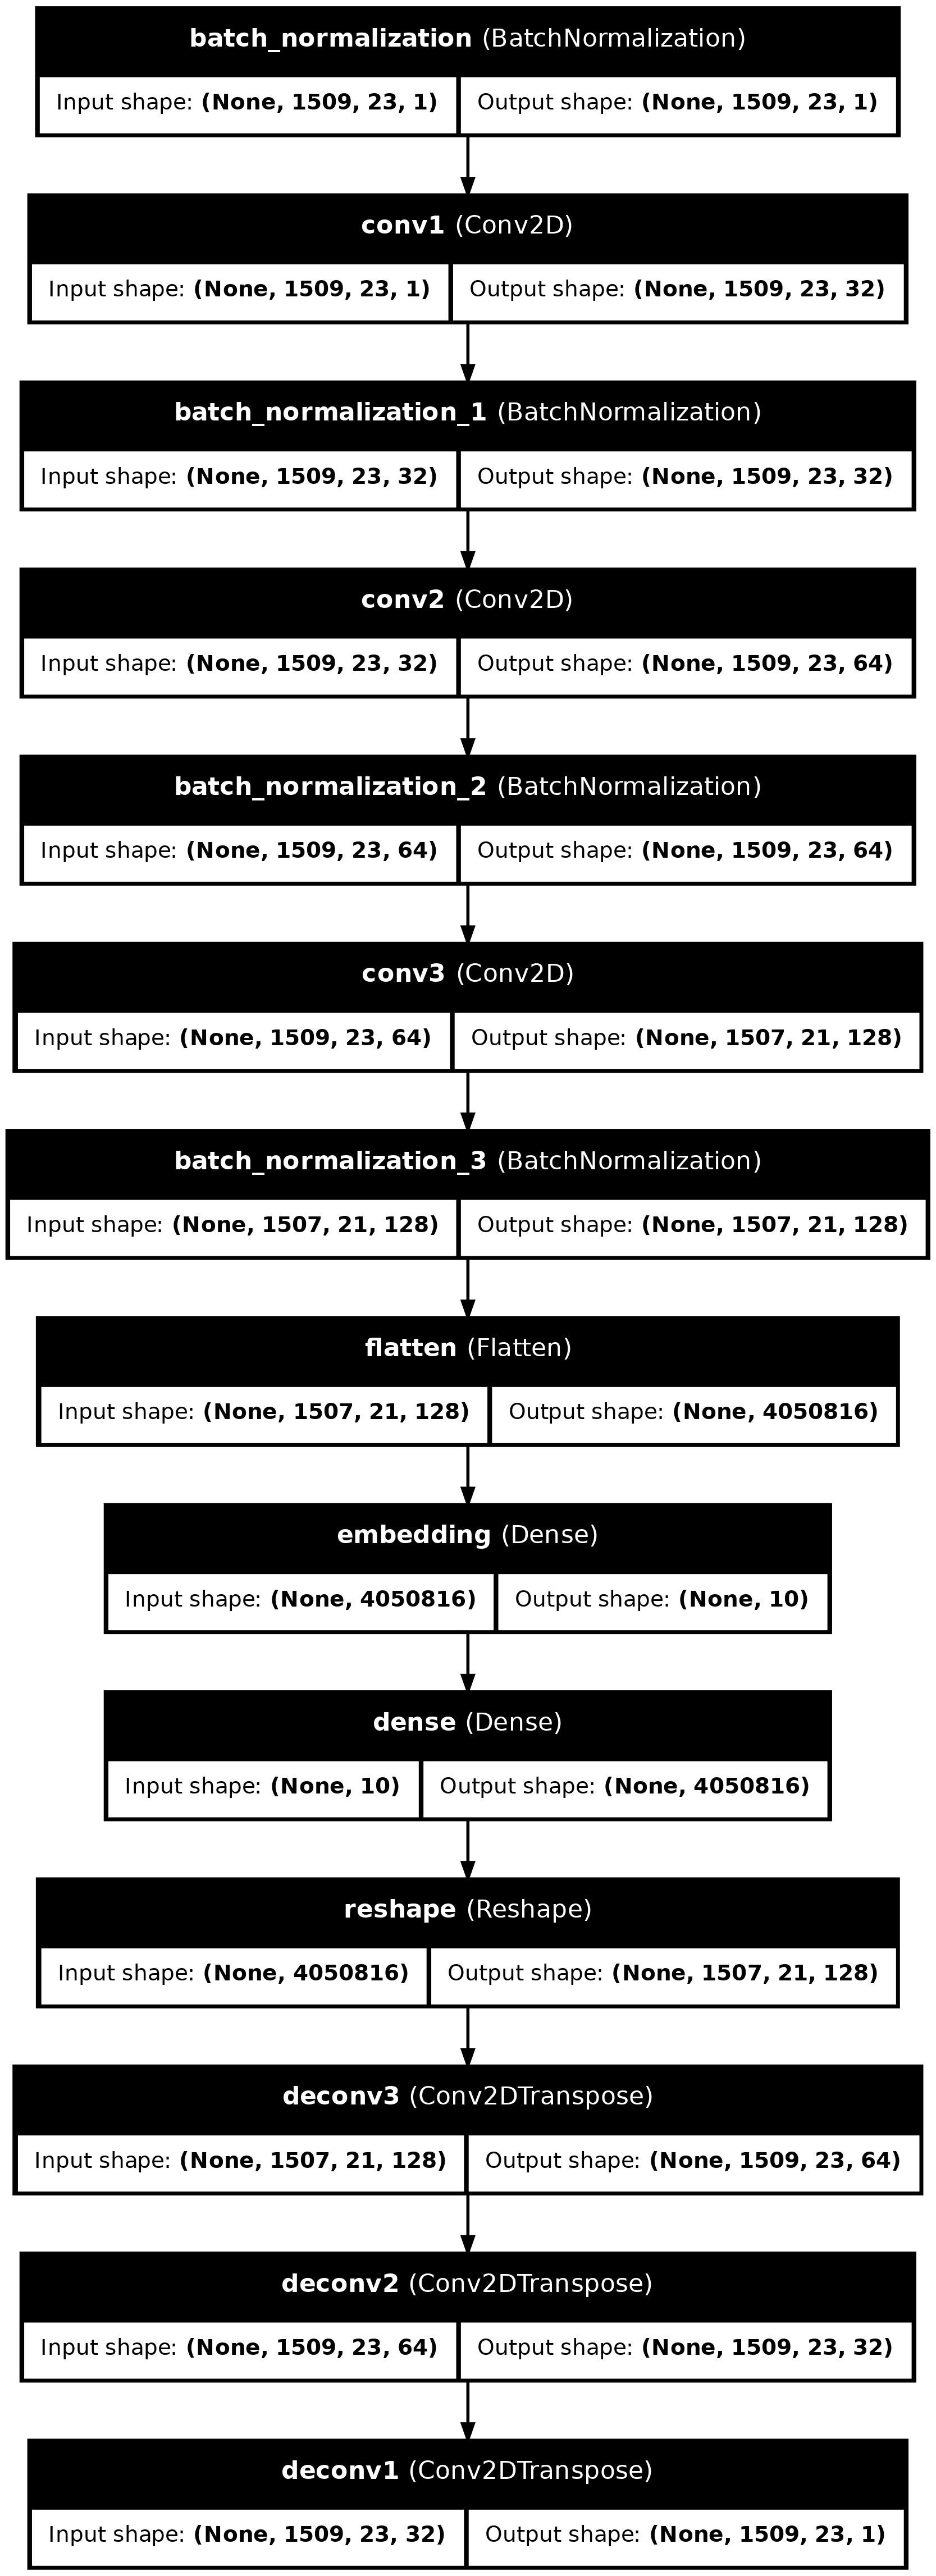

In [21]:
# plot the model
plot_model(model, 'CAE-model.png', show_shapes=True, show_layer_names=True)

In [22]:
# compile the model and callbacks
optimizer = 'adam'
model.compile(optimizer=optimizer, loss='mse')
from keras.callbacks import CSVLogger
csv_logger = CSVLogger(args['save_dir'] + '/%s-pretrain-log.csv' % 'data')

## Trainer

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 20, verbose = 1, mode = 'min', restore_best_weights = True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'best_model.keras', monitor = 'loss', save_best_only = True)
#args['batch_size'] = 8
#args['epochs'] = 1000
#args['save_dir'] = 'results/temp'

# begin training
from time import time
t0 = time()

model.fit(x, x, 
    batch_size=8, #args['batch_size'], 
    epochs=args['epochs'], 
    verbose = 1, 
    callbacks=[early_stopping, model_checkpoint, csv_logger]
    ) 
print('Training time: ', time() - t0)
model.save(args['save_dir'] + '/%s-pretrain-model-%d.keras' % ('data', args['epochs']))

Epoch 1/1000


I0000 00:00:1747855878.973638   22104 service.cc:152] XLA service 0x7f3748001f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747855878.973663   22104 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-21 19:31:19.017314: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747855879.306751   22104 cuda_dnn.cc:529] Loaded cuDNN version 90300


2/9 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 1.1368 

I0000 00:00:1747855889.087109   22104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 1.3959
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 683ms/step - loss: 1.0810
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 869ms/step - loss: 1.0345
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 738ms/step - loss: 1.0141
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.9789
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 777ms/step - loss: 1.0009
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 782ms/step - loss: 0.9485
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 741ms/step - loss: 0.9979
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.1166
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - loss: 0.9711
Epoch 11/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.0562
Epoch 12/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.0400
Epoch 13/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 718ms/step - loss: 0.9525
Epoch 14/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.9980
Epoch 15/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step - loss: 1.0015
Epoch 16/

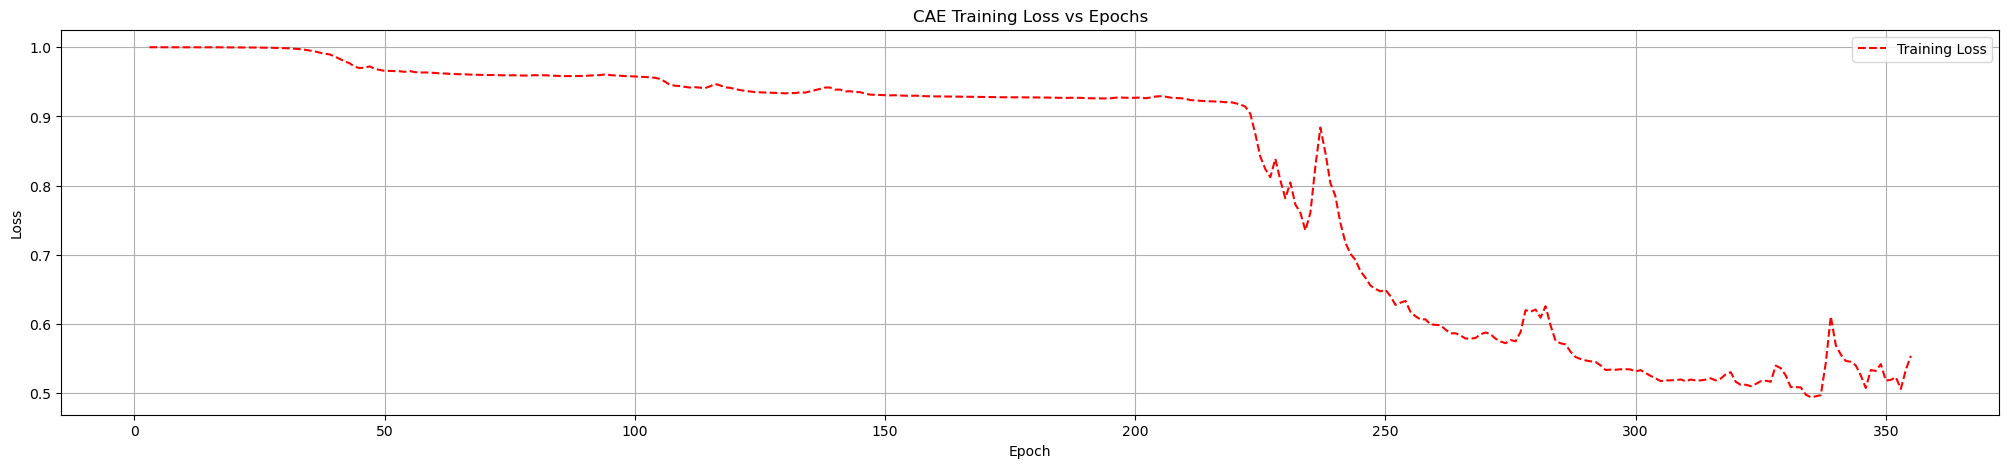

In [24]:
import matplotlib.pyplot as plt
training_loss = model.history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.figure(figsize = (25,5))
plt.plot(epoch_count[2:], training_loss[2:], "r--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss"])
plt.title("CAE Training Loss vs Epochs")
plt.grid()
plt.savefig('CAE-clustering-training-loss.png')
plt.show()

In [25]:
model

<Sequential name=sequential, built=True>

In [26]:
features = model.predict(x)
features


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 712ms/step


array([[[[-0.86789095],
         [-0.9775981 ],
         [-0.9886614 ],
         ...,
         [ 0.16456771],
         [ 0.14308995],
         [ 0.18351293]],

        [[-1.1389596 ],
         [-1.2188454 ],
         [-1.2084185 ],
         ...,
         [ 0.08580154],
         [ 0.06764925],
         [ 0.10089165]],

        [[-1.3508073 ],
         [-1.4680847 ],
         [-1.4458538 ],
         ...,
         [ 0.14193112],
         [ 0.11438721],
         [ 0.16730547]],

        ...,

        [[ 0.0152365 ],
         [-0.06444323],
         [-0.05740523],
         ...,
         [ 0.01779389],
         [-0.03713149],
         [-0.01287979]],

        [[-1.0670322 ],
         [-1.1814461 ],
         [-1.3329142 ],
         ...,
         [-0.554829  ],
         [-0.62015474],
         [-0.6170496 ]],

        [[-0.91428983],
         [-0.99580824],
         [-1.1213576 ],
         ...,
         [-0.52922106],
         [-0.58037007],
         [-0.55523574]]],


       [[[-1.3431524 ],


In [27]:
features.shape

(70, 1509, 23, 1)

## cluster

In [28]:
from sklearn.cluster import AgglomerativeClustering
Agg_Clustering = AgglomerativeClustering(n_clusters = n_clusters)
features = np.reshape(features, newshape = (features.shape[0], -1))
pred = Agg_Clustering.fit_predict(features)

In [29]:
pred

array([2, 0, 8, 2, 2, 8, 2, 2, 8, 0, 0, 0, 2, 2, 2, 8, 2, 2, 8, 2, 2, 2,
       2, 2, 7, 5, 0, 2, 7, 7, 7, 6, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 9, 9, 4, 9, 3, 3, 1, 6, 3, 6, 6, 6, 1, 6, 1, 6, 1, 1, 4,
       4, 3, 1, 1])

In [30]:
indices = np.array(indices)
indices.shape

(70,)

In [31]:
clustered_data = np.vstack((indices, pred)).T

In [32]:
cluster_df = pd.DataFrame(clustered_data, columns = ['Index','Cluster'])
cluster_df['Cluster'] = cluster_df['Cluster'].astype(np.int32)
cluster_df

,Index,Cluster
0,ARKK,2
1,ARKQ,0
2,ARKW,8
3,CIBR,2
4,CQQQ,2
...,...,...
65,XLK,4
66,XNTK,4
67,XSD,3
68,XSW,1


In [33]:
cluster_df.to_csv(f'{current_path}/etfs_tech_cluster_Index_data.csv')

## CAE Cluster Analysis: Historical Price Series by Cluster

For each cluster identified by the CAE, the normalized price series of the ETFs belonging to that cluster are displayed.

In [34]:
close_prices = pd.read_excel(f'{current_path}/etf_close_prices.xlsx')
close_prices.set_index('date', inplace=True)
close_prices = close_prices[close_prices.index.year < 2024] 


Cluster 0:
Number of ETFs: 5
Tickers: ARKQ, FTXL, FXI, FXL, IYW


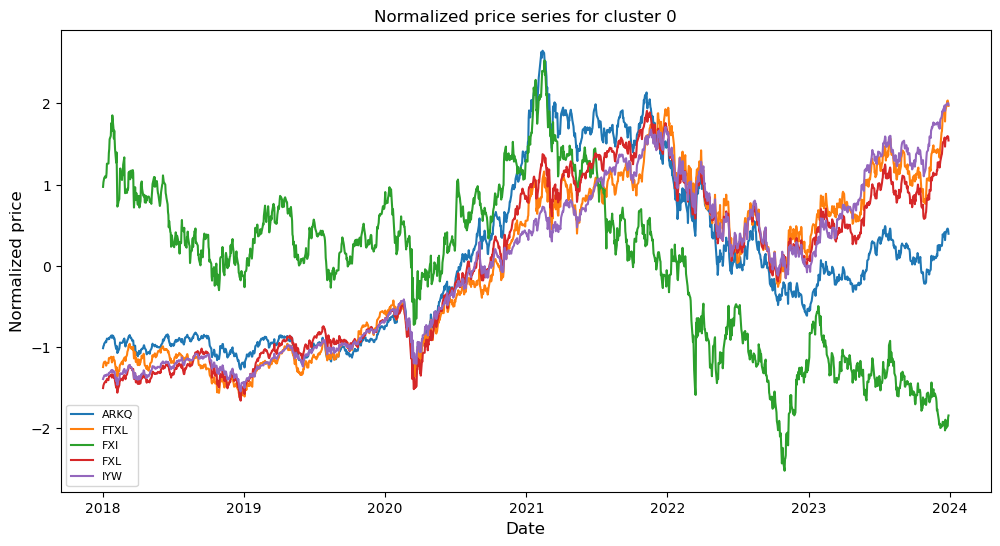


Cluster 1:
Number of ETFs: 11
Tickers: ONEQ, PIN, PIZ, PNQI, SOXX, TLTE, USD, VV, XITK, XSW, XT


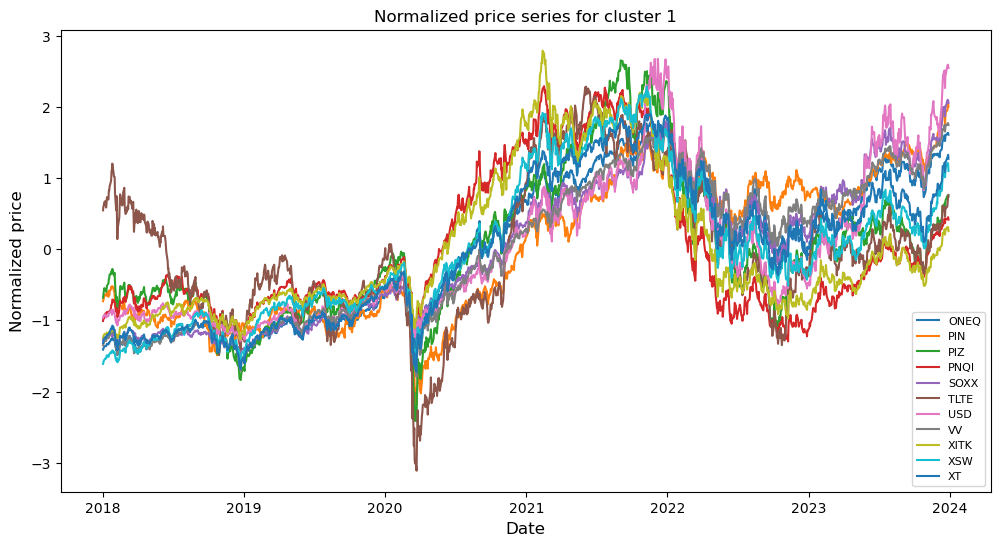


Cluster 2:
Number of ETFs: 16
Tickers: ARKK, CIBR, CQQQ, FDN, FTC, FXP, FYC, GAMR, IDLV, IDX, IGM, IGV, IPAY, ISMD, ISRA, KWEB


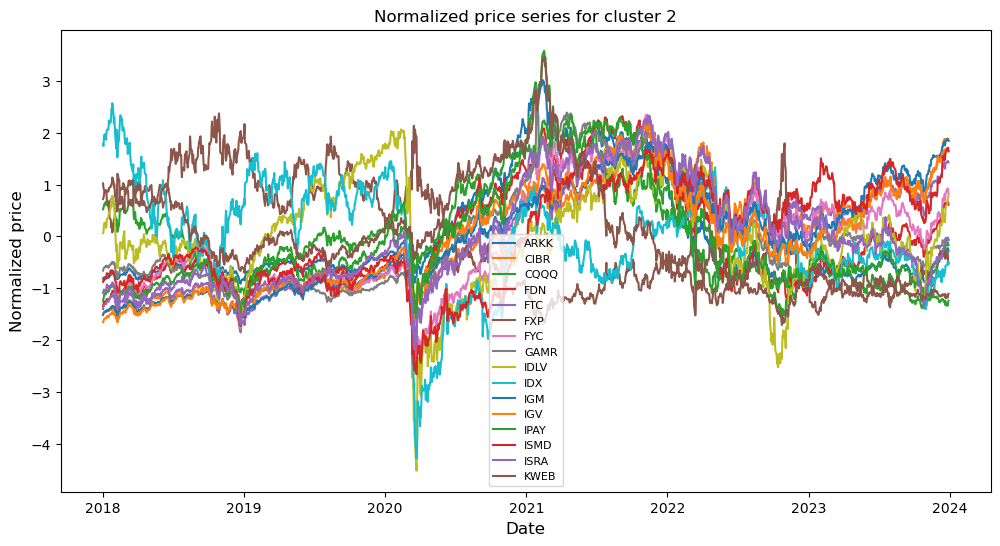


Cluster 3:
Number of ETFs: 4
Tickers: SOXL, SOXS, TDIV, XSD


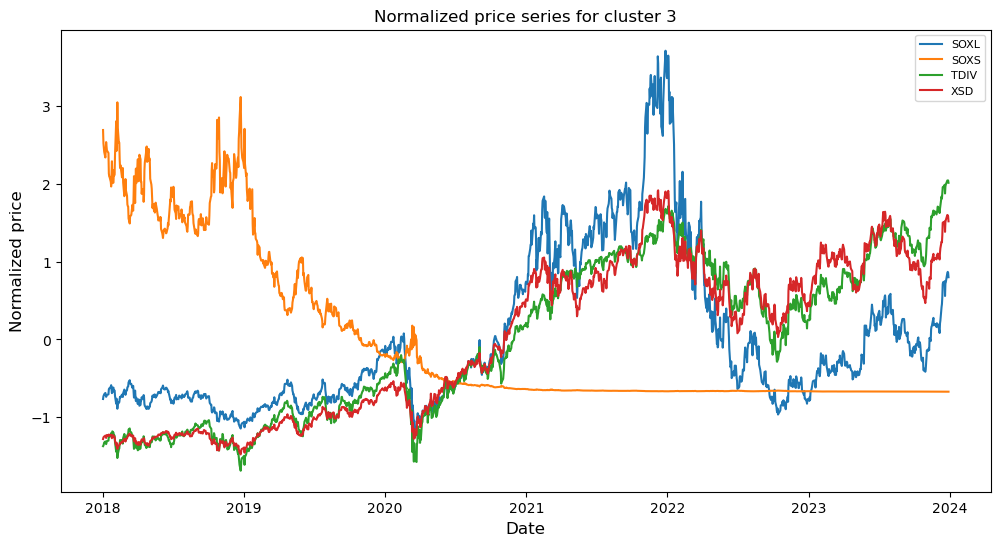


Cluster 4:
Number of ETFs: 14
Tickers: PRNT, PSCT, PSI, PTF, QQEW, QQQ, QQQE, QQXT, QTEC, QYLD, REW, SMH, XLK, XNTK


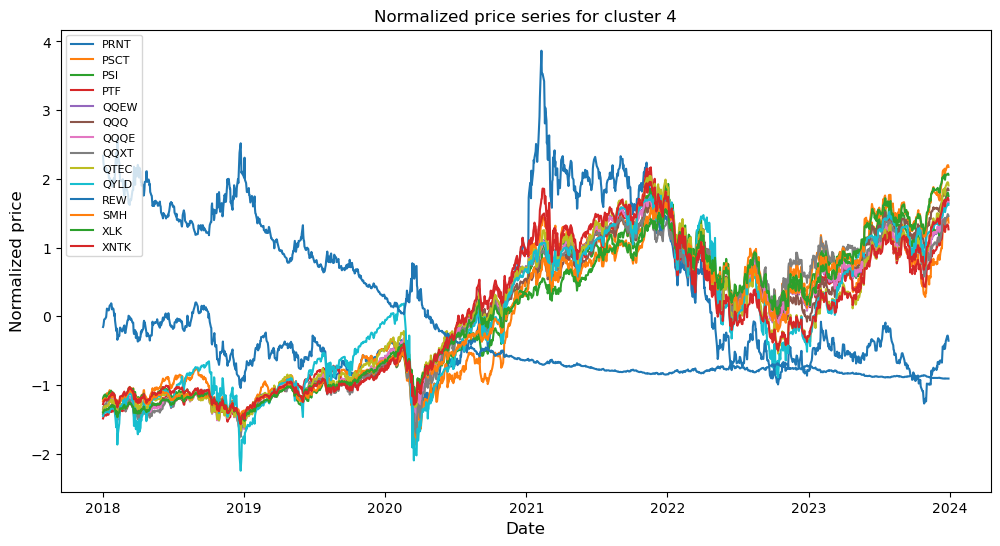


Cluster 5:
Number of ETFs: 1
Tickers: IXN


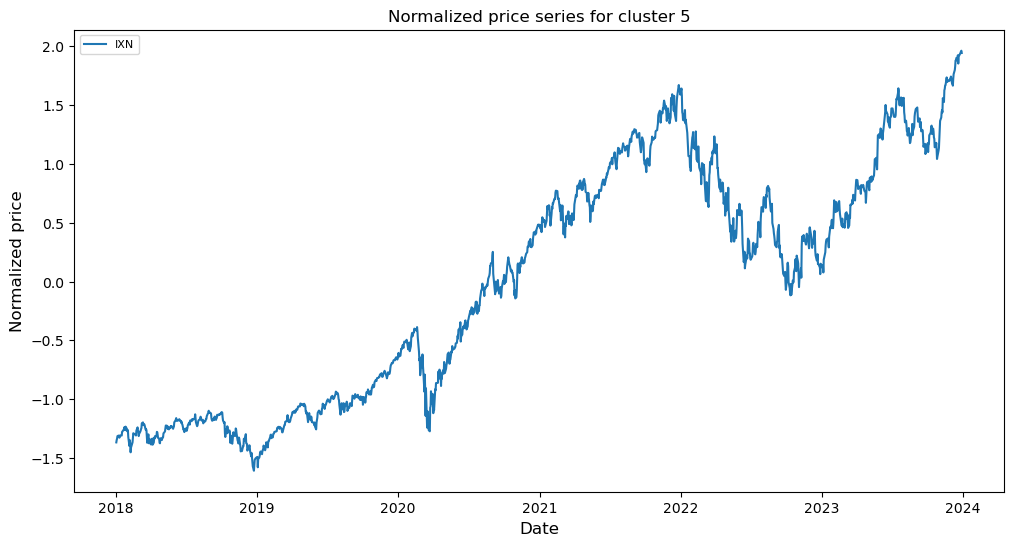


Cluster 6:
Number of ETFs: 7
Tickers: NXTG, SUSA, TECL, TECS, TLTD, TQQQ, VGT


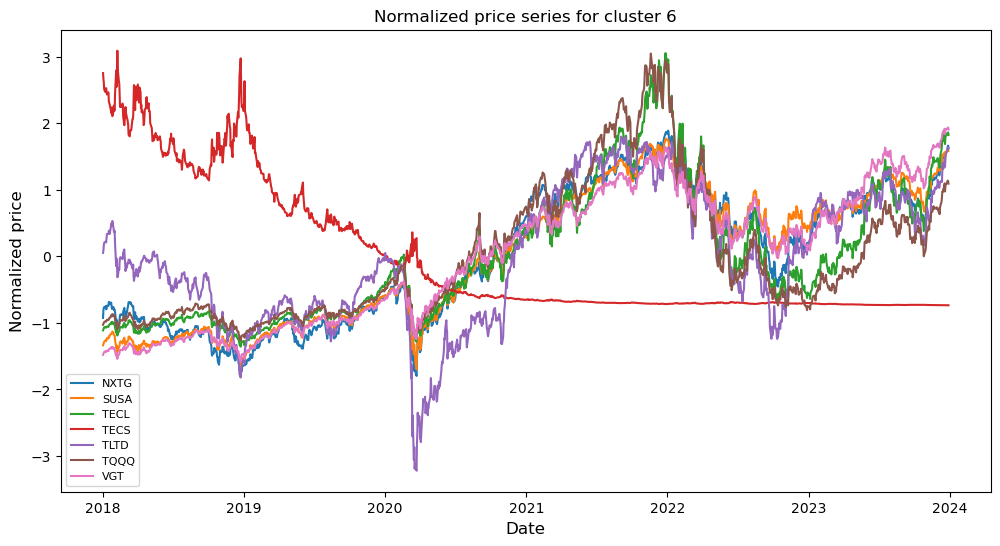


Cluster 7:
Number of ETFs: 4
Tickers: ITEQ, MTUM, NULG, NUMG


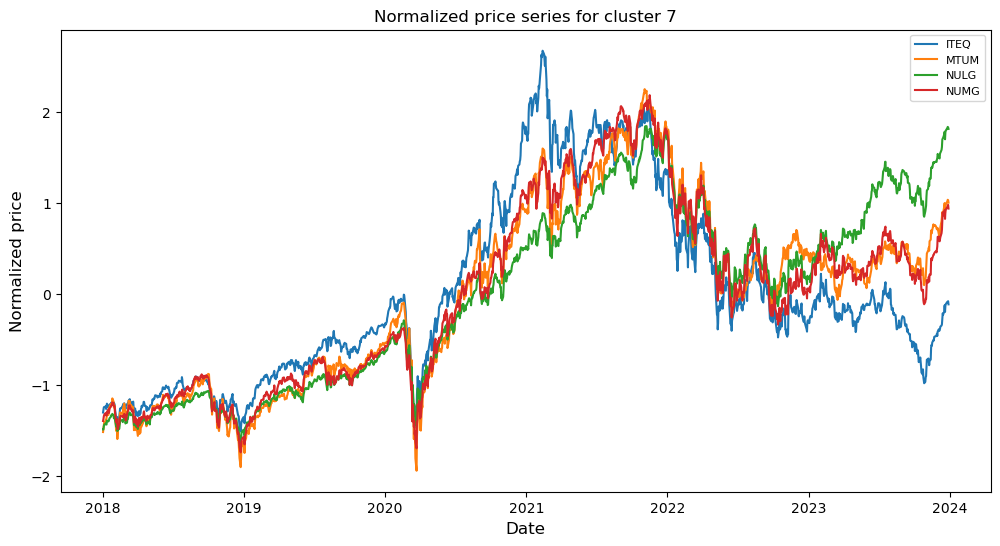


Cluster 8:
Number of ETFs: 5
Tickers: ARKW, CWEB, FTEC, HACK, IEFA


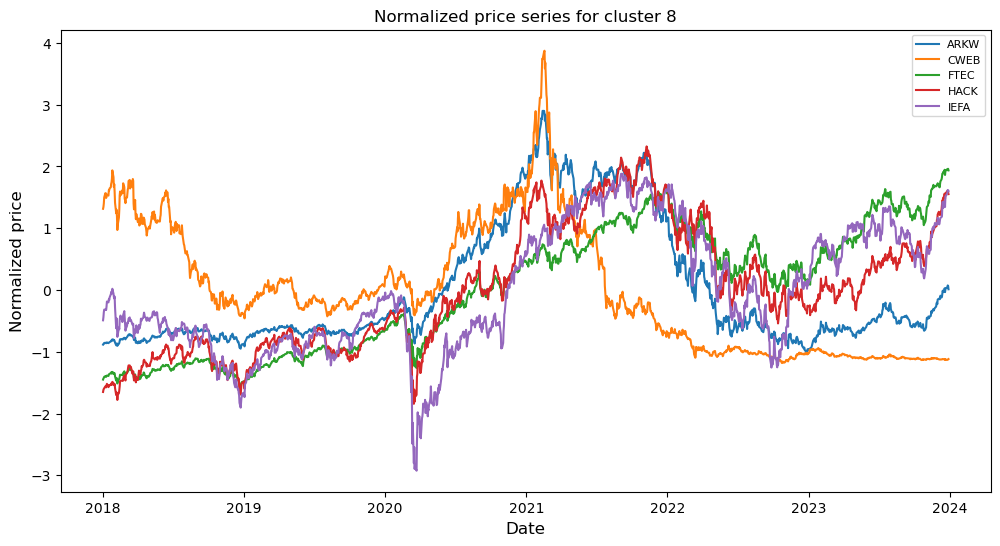


Cluster 9:
Number of ETFs: 3
Tickers: ROM, SKYY, SNSR


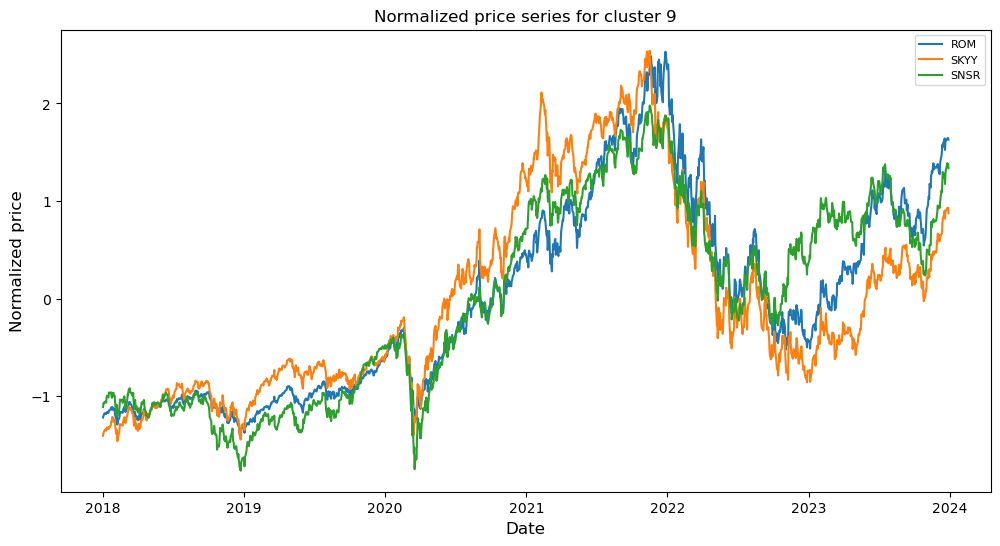

In [36]:
for cluster_id in sorted(cluster_df['Cluster'].unique()):
    # Get tickers in this cluster
    tickers_in_cluster = cluster_df[cluster_df['Cluster'] == cluster_id]['Index']
    print(f"\nCluster {cluster_id}:")
    print(f"Number of ETFs: {len(tickers_in_cluster)}")
    print(f"Tickers: {', '.join(map(str, tickers_in_cluster))}")
    
    # Plot normalized price series
    plt.figure(figsize=(12, 6))
    for ticker in tickers_in_cluster:
        if str(ticker) in close_prices.columns:
            # Normalize the price series
            series = close_prices[str(ticker)]
            normed = (series - series.mean()) / series.std()
            plt.plot(series.index, normed, label=str(ticker))
    plt.title(f"Normalized price series for cluster {cluster_id}")
    plt.xlabel("Date", size=12)
    plt.ylabel("Normalized price", size=12)
    plt.legend(fontsize=8)
    plt.savefig(f'{current_path}/images/cluster_CAE_{cluster_id}.png', dpi=300, bbox_inches='tight')
    plt.show()